In [1]:
from ASDM.ASDM import Structure
from ASDM.Utilities import plot_time_series
import pandas as pd
import plotly.express as px
pd.options.display.max_columns = 100

# First we re-create the model manually

In [36]:
class PatientFlow(Structure):
    def __init__(self):
        super(PatientFlow, self).__init__()
        self.add_stock("Waiting_list", 100, in_flows=['GP_referrals'], out_flows=['Hospital_admission_rate'])
        self.add_stock("In_hospital", 30, in_flows=['Hospital_admission_rate'], out_flows=['Treatment_completion_rate'])
        self.add_stock("In_community_care", 100, in_flows=['Treatment_completion_rate'], out_flows=['Community_care_leaving_rate'])
        
        self.add_aux("Hospital_bed_capacity", 30)
        self.add_aux("Hospital_bed_vacancy", "Hospital_bed_capacity-In_hospital")
        self.add_aux("p_completion", 0.1)
        self.add_aux("p_leaving", 0.1)

        self.add_flow("GP_referrals", 3)
        self.add_flow(
            "Hospital_admission_rate", 
            "MIN(Waiting_list, MAX(Treatment_completion_rate, Hospital_bed_vacancy))",  # mimicing the non-negative stock behaviour
            )
        self.add_flow(
            "Treatment_completion_rate", 
            "RBINOM(In_hospital, p_completion)", 
            )
        self.add_flow(
            "Community_care_leaving_rate", 
            "RBINOM(In_community_care, p_leaving)", 
            )

        # mapping SD functions to Python functions
        self.custom_functions['MAX'] = max
        self.custom_functions['MIN'] = min


In [37]:
# Model Object Created

patient_flow_model = PatientFlow()
patient_flow_model.clear_last_run()
patient_flow_model.simulate(time=20, dt=1)
df_patient_flow = patient_flow_model.export_simulation_result()
df_patient_flow['In_hospital']

[30.0,
 30.0,
 30.0,
 30.0,
 30.0,
 30.0,
 30.0,
 30.0,
 30.0,
 30.0,
 30.0,
 30.0,
 30.0,
 30.0,
 30.0,
 30.0,
 30.0,
 30.0,
 30.0,
 30.0,
 30.0]

In [4]:
# To turn it into a dataframe (if needed)

dataframe = pd.DataFrame(df_patient_flow)
dataframe.head()

Waiting_list  GP_referrals  In_hospital  p_completion  \
0        100.00           3.0         30.0           0.1   
1         99.75           3.0         30.0           0.1   
2         99.50           3.0         30.0           0.1   
3         99.00           3.0         30.0           0.1   
4         99.25           3.0         30.0           0.1   

   Treatment_completion_rate  Hospital_bed_capacity  Hospital_bed_vacancy  \
0                        4.0                   30.0                   0.0   
1                        4.0                   30.0                   0.0   
2                        5.0                   30.0                   0.0   
3                        2.0                   30.0                   0.0   
4                        4.0                   30.0                   0.0   

   Hospital_admission_rate  In_community_care  p_leaving  \
0                      4.0             100.00        0.1   
1                      4.0              98.25        0.1   
2                      5.0              96.25        0.1   
3                      2.0              94.50        0.1   
4                      4.0              93.00        0.1   

   Community_care_leaving_rate  Weeks  
0                         11.0      0  
1                         12.0      1  
2                         12.0      2  
3                          8.0      3  
4                         17.0      4

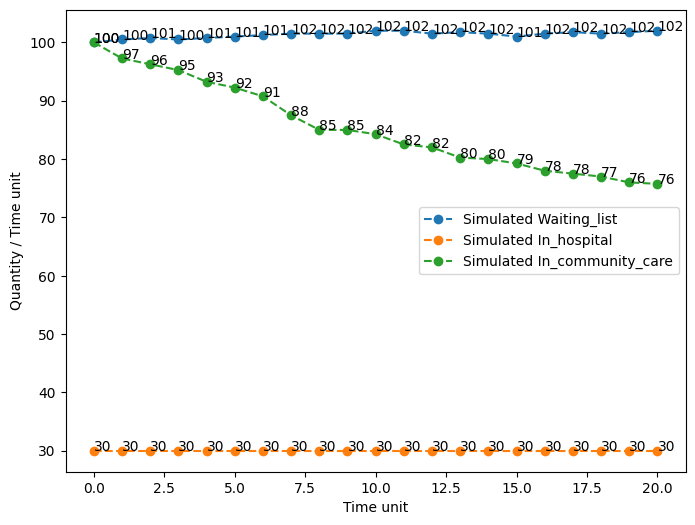

In [38]:
# Time Series Plotting

plot_time_series({
    "Waiting_list": {"Simulated": df_patient_flow['Waiting_list']},
    "In_hospital": {"Simulated": df_patient_flow['In_hospital']},
    "In_community_care": {"Simulated": df_patient_flow['In_community_care']}
    }, separate_ax=False)

# Now Compiled from Source

In [39]:
# Now with compiled model
# Compile the model from XMILE

model = Structure(from_xmile='models/Elective Recovery Model.stmx')

ENGINE Reading XMILE model from models/Elective Recovery Model.stmx


In [40]:
# Clearing the last run and compiling exporting the result

model.clear_last_run()
model.simulate()
results = model.export_simulation_result()

In [42]:
# Here are the keys

results.keys()

dict_keys(['Recognised_need_for_GP_consultation', 'Expected_population_rate_of_incidence_pw', 'Underlying_trend_in_health_needs', 'Switch_for_demographic_increase', 'Incidence_of_condition', 'Percent_people_not_presenting_during_COVID', 'COVID_period', 'COVID_switch', 'Decision_not_to_present', 'Need_presenting_as_usual', 'Holding_stock_of_potential_unmet_need', 'Holding_stock_released_at_end_of_COVID', 'Outcome_of_consultation', 'Percent_of_need_referred_for_diagnostics', 'NFA_following_initial_consultation', 'Proceeding_to_tests_without_COVID_delay', 'Average_pre_COVID_wait_for_diagnostics', 'Waiting_for_diagnostics', 'Period_of_return_in_wks', 'Percent_of_unmet_need_returning', 'Depleting_stock_of_unmet_need', 'COVID_delayed_need_presenting', 'Delayed_need_not_presenting', 'Increased_percent_of_need_for_diagnostics_for_COVID_delayed_demand', 'Delayed_demand_to_wait_for_diagnostics', 'Pre_COVID_capacity_for_diagnostics', 'Reduced_diagnostic_capacity_during_COVID', 'Percent_increase_i

### Plot ASDM simulation DataFrame

In [43]:
df = pd.DataFrame(results)
# df['Average_wait_for_diagnostic_test'] = pd.to_datetime(df['Average_wait_for_diagnostic_test'])  # Convert the 'time' column to datetime objects

# Now specify the columns directly
fig = px.line(df, x='Weeks', y=["Waiting_more_than_12mths", "Waiting_6_to_12mths_for_treatment", "Waiting_12_to_24mths_for_treatment"])

fig.update_layout(
    title='Treatment Waiting Times',
    xaxis_title='Weeks',
    yaxis_title='Number of Patients',
    legend_title='Waiting Period',
)

fig.show()

# Revised Goal Gap Model

In [44]:
# Now with compiled model
# Compile the model from XMILE

model = Structure(from_xmile='models/Revised_Goal_Gap2.stmx')

ENGINE Reading XMILE model from models/Revised_Goal_Gap2.stmx


In [45]:
# Clearing the last run and compiling exporting the result

model.clear_last_run()
model.simulate()
results = model.export_simulation_result()

In [46]:
# Here are the keys

results.keys()

dict_keys(['>_78_weeks', 'Goal_1', 'Gap_1', 'Adjustment', 'Intervention_Outflow', 'Closed_Long-_Wait_Pathways', 'Months'])

### Plot ASDM simulation DataFrame

In [15]:
df = pd.DataFrame(results)
# df['Average_wait_for_diagnostic_test'] = pd.to_datetime(df['Average_wait_for_diagnostic_test'])  # Convert the 'time' column to datetime objects

# Now specify the columns directly
fig = px.line(df, x='Months', y=[">_78_weeks"])

fig.update_layout(
    title='Treatment Waiting Times',
    xaxis_title='Months',
    yaxis_title='>_78_weeks',
    legend_title='Waiting Period',
)

fig.show()

# Endoscopy Recovery

In [23]:
# Now with compiled model
# Compile the model from XMILE

model = Structure(from_xmile='models/Endoscopy v3b.stmx')

ENGINE Reading XMILE model from models/Endoscopy v3b.stmx


In [24]:
# Clearing the last run and compiling exporting the result

model.clear_last_run()
model.simulate()
results = model.export_simulation_result()

In [33]:
# Here are the keys

results.keys()

dict_keys(['Waiting_for_colonoscopy', 'New_colonoscopy_referrals_added_to_waiting_list', 'Capacity_split_for_procedures', 'Actual_R_referrals', 'Actual_referrals', 'Actual_U_referrals', 'Actual_C_referrals', 'Expected_R_referrals', 'Expected_referrals', 'Expected_C_referrals', 'Cancer_ref_dampener', 'Expected_U_referrals', 'Referrals_made', 'Virtual_backlog_of_COVID_suppressed_referrals', 'Referrals_not_materialising', 'Average_months_for_COVID_related_backlog_to_return', 'Returning_referrals_without_smth', 'Returning_referrals', 'Percent_pa_of_backlog_not_returning', 'COVID_suppressed_non_returning_referrals', 'Actual_and_forecast_referrals_for_triage', 'Bowel_symptom_referrals_triage_outcomes_split', 'Planned_activity_demand_Lower_GI', 'Split_of_colonoscopies', 'Actual_colonoscopy_lists_per_month', 'Expected_colonoscopies_per_month', 'Change_in_lists', 'Monthly_lists_colonoscopy', 'Direct_urgent_referrals', 'Waiting_for_urgent_colonoscopy', 'TAT_for_urgent_colonoscopies', 'Urgent_col

In [35]:
results

{'Waiting_for_colonoscopy': {('Screening_programme',): [0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   

### To be Continued...

In [32]:
df = pd.DataFrame(results)
# df['Average_wait_for_diagnostic_test'] = pd.to_datetime(df['Average_wait_for_diagnostic_test'])  # Convert the 'time' column to datetime objects

# Now specify the columns directly
fig = px.line(x=results[""], y=results["Capacity_split_for_procedures"])

fig.update_layout(
    title='Treatment Waiting Times',
    xaxis_title='Months',
    yaxis_title='Capacity_split_for_procedures',
    legend_title='Waiting Period',
)

fig.show()

ValueError: Mixing dicts with non-Series may lead to ambiguous ordering.

In [34]:
import plotly.graph_objects as go

fig = go.Figure(
    data=go.Scatter(x=results["Months"], y=results["Capacity_split_for_procedures"], mode='lines+markers')
)

fig.update_layout(
    title='Net Change of People Requiring Bowel Surveillance',
    xaxis_title='Months',
    yaxis_title='Net Change',
)

fig.show()


ValueError: 
    Invalid value of type 'builtins.dict' received for the 'y' property of scatter
        Received value: {('Upper_GI',): [0.493421052631579, 0.4916330514980199, 0.4898450503644608, 0.4880570492309017, 0.4862690480973426, 0.4844810469637835, 0.48269304583022443, 0.48090504469666534, 0.47911704356310625, 0.47732904242954716, 0.47554104129598807, 0.473753040162429, 0.4719650390288699, 0.4701770378953108, 0.4683890367617517, 0.46660103562819255, 0.4648130344946335, 0.46302503336107437, 0.46123703222751533, 0.4594490310939562, 0.4576610299603971, 0.455873028826838, 0.4540850276932789, 0.4522970265597198, 0.4505090254261607, 0.44872102429260163, 0.44693302315904254, 0.44514502202548345, 0.44335702089192436, 0.44156901975836527, 0.4397810186248062, 0.4379930174912471, 0.436205016357688, 0.43692621545970245, 0.43764741456171685, 0.4383686136637313, 0.43908981276574577, 0.43981101186776017, 0.44053221096977463, 0.44125341007178903, 0.4419746091738035, 0.44269580827581795, 0.44341700737783235, 0.4441382064798468, 0.4448594055818612, 0.44558060468387567, 0.4463018037858901, 0.44702300288790453, 0.447744201989919, 0.44846540109193345, 0.44918660019394785, 0.4499077992959623, 0.45062899839797677, 0.45135019749999117, 0.4520713966020056, 0.45279259570402003, 0.4535137948060345, 0.45423499390804895, 0.45495619301006335, 0.4556773921120778, 0.4563985912140922, 0.45711979031610667, 0.4578409894181211, 0.4585621885201355, 0.45928338762215, 0.4587851555164131, 0.4582869234106762, 0.45778869130493927, 0.45729045919920236, 0.45679222709346545, 0.45629399498772855, 0.45579576288199164, 0.45529753077625473, 0.4547992986705178, 0.4543010665647809, 0.453802834459044, 0.4533046023533071, 0.4528063702475702, 0.4523081381418333, 0.4518099060360964, 0.4513116739303595, 0.4508134418246226, 0.45031520971888567, 0.44981697761314876, 0.44931874550741185, 0.44882051340167495, 0.44832228129593804, 0.44782404919020113, 0.44732581708446423, 0.4468275849787273, 0.4463293528729904, 0.4458311207672535, 0.4453328886615166, 0.4448346565557797, 0.4443364244500428, 0.4438381923443059, 0.443339960238569, 0.44423504768801025, 0.44513013513745153, 0.4460252225868928, 0.4469203100363341, 0.44781539748577537, 0.44871048493521665, 0.4496055723846579, 0.45050065983409926, 0.45139574728354054, 0.4522908347329818, 0.4531859221824231, 0.4540810096318644, 0.45497609708130565, 0.45587118453074693, 0.4567662719801882, 0.4576613594296295, 0.45855644687907077, 0.45945153432851205, 0.4603466217779533, 0.4612417092273946, 0.4621367966768359, 0.46303188412627716, 0.46392697157571844, 0.4648220590251597, 0.46571714647460105, 0.46661223392404233, 0.4675073213734836, 0.4684024088229249, 0.46929749627236617, 0.47019258372180744, 0.4710876711712487, 0.47198275862069, 0.47220422764635156, 0.4724256966720131, 0.4726471656976747, 0.47286863472333623, 0.4730901037489978, 0.47331157277465935, 0.4735330418003209, 0.4737545108259825, 0.4739759798516441, 0.47419744887730564, 0.4744189179029672, 0.47464038692862875, 0.4748618559542903, 0.47508332497995187, 0.47530479400561343, 0.475526263031275, 0.47574773205693655, 0.4759692010825981, 0.47619067010825966, 0.4764121391339212, 0.4766336081595828, 0.47685507718524434, 0.4770765462109059, 0.47729801523656745, 0.47751948426222907, 0.4777409532878906, 0.4779624223135522, 0.47818389133921374, 0.4784053603648753, 0.47862682939053686, 0.4788482984161984, 0.47906976744186, 0.4782676853768411, 0.4774656033118223, 0.47666352124680345, 0.4758614391817846, 0.4750593571167658, 0.4742572750517469, 0.47345519298672806, 0.47265311092170925, 0.4718510288566904, 0.47104894679167153, 0.47024686472665267, 0.46944478266163386, 0.468642700596615, 0.46784061853159614, 0.46703853646657734, 0.4662364544015585, 0.4654343723365396, 0.4646322902715208, 0.46383020820650195, 0.4630281261414831, 0.4622260440764643, 0.4614239620114454, 0.46062187994642656, 0.4598197978814077, 0.4590177158163889, 0.45821563375137003, 0.45741355168635117, 0.45661146962133237, 0.4558093875563135, 0.45500730549129464, 0.45420522342627584, 0.453403141361257, 0.4536998408968979, 0.45399654043253884, 0.4542932399681798, 0.45458993950382076, 0.4548866390394617, 0.4551833385751026, 0.45548003811074356, 0.4557767376463845, 0.4560734371820254, 0.45637013671766635, 0.4566668362533073, 0.4569635357889482, 0.4572602353245892, 0.45755693486023014, 0.45785363439587107, 0.458150333931512, 0.45844703346715293, 0.45874373300279386, 0.4590404325384348, 0.4593371320740758, 0.4596338316097167, 0.45993053114535765, 0.4602272306809986, 0.4605239302166395, 0.46082062975228044, 0.4611173292879214, 0.4614140288235623, 0.46171072835920324, 0.4620074278948442, 0.46230412743048516, 0.4626008269661261, 0.462897526501767, 0.46287163397100056, 0.46284574144023416, 0.4628198489094677, 0.46279395637870124, 0.46276806384793484, 0.4627421713171684, 0.462716278786402, 0.4626903862556355, 0.46266449372486906, 0.46263860119410266, 0.4626127086633362, 0.4625868161325698, 0.46256092360180334, 0.4625350310710369, 0.4625091385402705, 0.462483246009504, 0.46245735347873757, 0.46243146094797116, 0.4624055684172047, 0.46237967588643825, 0.46235378335567184, 0.4623278908249054, 0.462301998294139, 0.4622761057633725, 0.46225021323260607, 0.46222432070183966, 0.4621984281710732, 0.4621725356403068, 0.46214664310954034, 0.4621207505787739, 0.4620948580480075, 0.462068965517241, 0.4620995759337418, 0.4621301863502426, 0.4621607967667434, 0.46219140718324414, 0.4622220175997449, 0.4622526280162457, 0.4622832384327465, 0.46231384884924726, 0.4623444592657481, 0.46237506968224884, 0.4624056800987496, 0.46243629051525037, 0.4624669009317512, 0.46249751134825196, 0.4625281217647527, 0.46255873218125354, 0.4625893425977543, 0.46261995301425507, 0.46265056343075583, 0.46268117384725665, 0.4627117842637574, 0.4627423946802582, 0.46277300509675895, 0.46280361551325977, 0.46283422592976053, 0.4628648363462613, 0.4628954467627621, 0.4629260571792629, 0.46295666759576365, 0.4629872780122644, 0.46301788842876523, 0.463048498845266, 0.4628105702128732, 0.4625726415804804, 0.4623347129480876, 0.46209678431569473, 0.4618588556833019, 0.4616209270509091, 0.4613829984185163, 0.4611450697861235, 0.4609071411537307, 0.46066921252133786, 0.46043128388894505, 0.46019335525655225, 0.45995542662415945, 0.45971749799176664, 0.45947956935937384, 0.45924164072698104, 0.4590037120945882, 0.4587657834621954, 0.4585278548298026, 0.45828992619740977, 0.45805199756501697, 0.45781406893262416, 0.4575761403002313, 0.4573382116678385, 0.4571002830354457, 0.4568623544030529, 0.4566244257706601, 0.4563864971382673, 0.45614856850587443, 0.4559106398734816, 0.4556727112410888, 0.455434782608696, 0.4557956060295328, 0.4561564294503695, 0.45651725287120626, 0.456878076292043, 0.4572388997128798, 0.4575997231337165, 0.45796054655455326, 0.45832136997539, 0.45868219339622673, 0.4590430168170635, 0.45940384023790026, 0.459764663658737, 0.46012548707957374, 0.4604863105004105, 0.46084713392124727, 0.461207957342084, 0.46156878076292074, 0.4619296041837575, 0.46229042760459427, 0.462651251025431, 0.46301207444626774, 0.4633728978671045, 0.46373372128794127, 0.464094544708778, 0.46445536812961474, 0.4648161915504515, 0.4651770149712882, 0.465537838392125, 0.46589866181296175, 0.4662594852337985, 0.4666203086546352, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.466981132075472, 0.4651567889024145, 0.4633324457293571, 0.46150810255629965, 0.45968375938324224, 0.4578594162101848, 0.45603507303712737, 0.4542107298640699, 0.4523863866910125, 0.45056204351795504, 0.4487377003448976, 0.44691335717184016, 0.44508901399878276, 0.4432646708257253, 0.4414403276526679, 0.4396159844796104, 0.437791641306553, 0.43596729813349555, 0.4341429549604381, 0.4323186117873807, 0.4304942686143232, 0.4286699254412658, 0.42684558226820835, 0.42502123909515094, 0.4231968959220935, 0.42137255274903607, 0.4195482095759786, 0.4177238664029212, 0.41589952322986373, 0.4140751800568063, 0.41225083688374886, 0.4104264937106914, 0.408602150537634, 0.40814069634703154, 0.40767924215642914, 0.4072177879658267, 0.40675633377522424, 0.4062948795846218, 0.40583342539401934, 0.40537197120341695, 0.4049105170128145, 0.40444906282221205, 0.40398760863160965, 0.4035261544410072, 0.40306470025040475, 0.4026032460598023, 0.40214179186919985, 0.40168033767859745, 0.401218883487995, 0.40075742929739255, 0.40029597510679016, 0.3998345209161877, 0.39937306672558526, 0.3989116125349828, 0.39845015834438036, 0.39798870415377796, 0.3975272499631755, 0.39706579577257306, 0.39660434158197067, 0.3961428873913682, 0.39568143320076576, 0.3952199790101633, 0.39475852481956086, 0.39429707062895847, 0.393835616438356, 0.3953776852428392, 0.3969197540473224, 0.3984618228518056, 0.40000389165628875, 0.40154596046077196, 0.40308802926525517, 0.4046300980697383, 0.40617216687422153, 0.4077142356787047, 0.4092563044831879, 0.4107983732876711, 0.41234044209215426, 0.41388251089663747, 0.4154245797011206, 0.41696664850560383, 0.418508717310087, 0.4200507861145702, 0.4215928549190534, 0.42313492372353656, 0.42467699252801977, 0.426219061332503, 0.42776113013698613, 0.42930319894146934, 0.4308452677459525, 0.4323873365504357, 0.43392940535491886, 0.43547147415940207, 0.4370135429638853, 0.43855561176836844, 0.44009768057285165, 0.4416397493773348, 0.443181818181818, 0.4397342355812749, 0.43628665298073177, 0.43283907038018865, 0.42939148777964553, 0.4259439051791024, 0.42249632257855924, 0.4190487399780161, 0.415601157377473, 0.4121535747769299, 0.40870599217638676, 0.40525840957584364, 0.4018108269753005, 0.3983632443747574, 0.3949156617742143, 0.39146807917367116, 0.388020496573128, 0.38457291397258486, 0.38112533137204174, 0.3776777487714986, 0.3742301661709555, 0.3707825835704124, 0.36733500096986926, 0.36388741836932614, 0.360439835768783, 0.3569922531682399, 0.3535446705676968, 0.35009708796715366, 0.34664950536661054, 0.34320192276606737, 0.33975434016552425, 0.33630675756498113, 0.332859174964438, 0.3368657226933642, 0.3408722704222904, 0.34487881815121657, 0.34888536588014274, 0.35289191360906896, 0.35689846133799513, 0.3609050090669213, 0.3649115567958475, 0.3689181045247737, 0.37292465225369986, 0.3769311999826261, 0.38093774771155225, 0.3849442954404785, 0.38895084316940465, 0.3929573908983308, 0.396963938627257, 0.4009704863561832, 0.4049770340851094, 0.4089835818140356, 0.41299012954296177, 0.41699667727188794, 0.4210032250008141, 0.42500977272974033, 0.4290163204586665, 0.4330228681875927, 0.4370294159165189, 0.44103596364544506, 0.44504251137437123, 0.44904905910329745, 0.4530556068322236, 0.45706215456114985, 0.461068702290076, 0.46111283214289855, 0.46115696199572115, 0.4612010918485437, 0.4612452217013663, 0.4612893515541888, 0.46133348140701136, 0.46137761125983395, 0.4614217411126565, 0.4614658709654791, 0.4615100008183016, 0.46155413067112416, 0.46159826052394676, 0.4616423903767693, 0.4616865202295919, 0.46173065008241443, 0.46177477993523697, 0.46181890978805956, 0.4618630396408821, 0.4619071694937047, 0.46195129934652723, 0.4619954291993498, 0.46203955905217237, 0.4620836889049949, 0.4621278187578175, 0.46217194861064004, 0.46221607846346263, 0.46226020831628517, 0.4623043381691077, 0.4623484680219303, 0.46239259787475284, 0.46243672772757544, 0.462480857580398, 0.46360804092593805, 0.4647352242714782, 0.46586240761701825, 0.4669895909625584, 0.46811677430809845, 0.4692439576536385, 0.47037114099917865, 0.4714983243447187, 0.47262550769025885, 0.4737526910357989, 0.474879874381339, 0.4760070577268791, 0.4771342410724192, 0.4782614244179593, 0.4793886077634994, 0.4805157911090395, 0.4816429744545796, 0.48277015780011967, 0.4838973411456598, 0.48502452449119987, 0.48615170783674, 0.48727889118228007, 0.48840607452782014, 0.4895332578733603, 0.49066044121890035, 0.4917876245644405, 0.49291480790998055, 0.4940419912555206, 0.49516917460106075, 0.4962963579466008, 0.49742354129214095, 0.498550724637681, 0.4970335144927535, 0.49551630434782595, 0.49399909420289845, 0.4924818840579709, 0.4909646739130434, 0.4894474637681158, 0.4879302536231883, 0.48641304347826075, 0.48489583333333325, 0.4833786231884057, 0.4818614130434782, 0.4803442028985506, 0.4788269927536231, 0.47730978260869555, 0.47579257246376805, 0.4742753623188405, 0.472758152173913, 0.4712409420289855, 0.4697237318840579, 0.4682065217391304, 0.46668931159420285, 0.46517210144927534, 0.4636548913043478, 0.4621376811594203, 0.4606204710144927, 0.4591032608695652, 0.45758605072463765, 0.45606884057971014, 0.4545516304347826, 0.4530344202898551, 0.4515172101449275, 0.45, 0.45110189909297055, 0.4522037981859411, 0.4533056972789116, 0.4544075963718821, 0.45550949546485264, 0.4566113945578232, 0.4577132936507937, 0.45881519274376426, 0.4599170918367348, 0.46101899092970533, 0.46212089002267587, 0.4632227891156464, 0.4643246882086169, 0.4654265873015874, 0.46652848639455796, 0.4676303854875285, 0.46873228458049904, 0.4698341836734696, 0.4709360827664401, 0.4720379818594106, 0.47313988095238113, 0.47424178004535167, 0.4753436791383222, 0.47644557823129274, 0.4775474773242633, 0.4786493764172338, 0.47975127551020436, 0.4808531746031749, 0.4819550736961454, 0.4830569727891159, 0.48415887188208645, 0.485260770975057, 0.4856136132613968, 0.4859664555477366, 0.4863192978340764, 0.48667214012041626, 0.48702498240675607, 0.4873778246930959, 0.4877306669794357, 0.4880835092657755, 0.4884363515521153, 0.48878919383845515, 0.48914203612479495, 0.48949487841113476, 0.48984772069747456, 0.49020056298381437, 0.4905534052701542, 0.49090624755649404, 0.49125908984283384, 0.49161193212917365, 0.49196477441551345, 0.49231761670185326, 0.49267045898819306, 0.49302330127453287, 0.4933761435608727, 0.49372898584721253, 0.49408182813355234, 0.49443467041989214, 0.49478751270623195, 0.49514035499257175, 0.4954931972789116, 0.4958460395652514, 0.4961988818515912, 0.496551724137931, 0.49529622772506365, 0.4940407313121963, 0.4927852348993289, 0.49152973848646153, 0.49027424207359416, 0.4890187456607268, 0.4877632492478594, 0.48650775283499204, 0.48525225642212466, 0.4839967600092573, 0.4827412635963899, 0.48148576718352254, 0.48023027077065517, 0.4789747743577878, 0.4777192779449204, 0.47646378153205304, 0.47520828511918567, 0.47395278870631824, 0.47269729229345087, 0.4714417958805835, 0.4701862994677161, 0.46893080305484874, 0.46767530664198137, 0.466419810229114, 0.4651643138162466, 0.46390881740337925, 0.4626533209905119, 0.4613978245776445, 0.4601423281647771, 0.45888683175190975, 0.4576313353390424, 0.456375838926175, 0.45781494347429513, 0.45925404802241526, 0.4606931525705354, 0.4621322571186555, 0.46357136166677565, 0.4650104662148957, 0.46644957076301585, 0.467888675311136, 0.4693277798592561, 0.47076688440737624, 0.47220598895549637, 0.4736450935036165, 0.47508419805173663, 0.47652330259985676, 0.4779624071479769, 0.479401511696097, 0.4808406162442171, 0.4822797207923372, 0.48371882534045735, 0.4851579298885775, 0.4865970344366976, 0.48803613898481774, 0.48947524353293786, 0.490914348081058, 0.4923534526291781, 0.4937925571772982, 0.4952316617254183, 0.49667076627353846, 0.4981098708216586, 0.4995489753697787, 0.5009880799178988, 0.502427184466019, 0.502067244042365, 0.501707303618711, 0.501347363195057, 0.500987422771403, 0.500627482347749, 0.500267541924095, 0.499907601500441, 0.499547661076787, 0.499187720653133, 0.498827780229479, 0.498467839805825, 0.498107899382171, 0.497747958958517, 0.497388018534863, 0.49702807811120897, 0.496668137687555, 0.496308197263901, 0.495948256840247, 0.495588316416593, 0.495228375992939, 0.494868435569285, 0.494508495145631, 0.494148554721977, 0.493788614298323, 0.493428673874669, 0.493068733451015, 0.49270879302736104, 0.49234885260370703, 0.49198891218005303, 0.491628971756399, 0.491269031332745, 0.490909090909091, 0.4902913855873221, 0.48967368026555314, 0.4890559749437842, 0.48843826962201525, 0.48782056430024634, 0.48720285897847737, 0.48658515365670846, 0.48596744833493954, 0.4853497430131706, 0.48473203769140166, 0.4841143323696327, 0.4834966270478638, 0.4828789217260948, 0.4822612164043259, 0.48164351108255693, 0.481025805760788, 0.4804081004390191, 0.47979039511725013, 0.4791726897954812, 0.47855498447371225, 0.47793727915194334, 0.47731957383017437, 0.47670186850840546, 0.4760841631866365, 0.4754664578648676, 0.47484875254309866, 0.4742310472213297, 0.4736133418995608, 0.4729956365777918, 0.4723779312560229, 0.47176022593425393, 0.471142520612485, 0.4725410243819461, 0.4739395281514073, 0.4753380319208684, 0.47673653569032953, 0.47813503945979063, 0.47953354322925174, 0.4809320469987129, 0.482330550768174, 0.48372905453763515, 0.48512755830709625, 0.48652606207655735, 0.4879245658460185, 0.4893230696154796, 0.49072157338494077, 0.49212007715440187, 0.493518580923863, 0.4949170846933241, 0.49631558846278523, 0.4977140922322464, 0.4991125960017075, 0.5005110997711686, 0.5019096035406297, 0.5033081073100909, 0.504706611079552, 0.5061051148490131, 0.5075036186184743, 0.5089021223879353, 0.5103006261573965, 0.5116991299268576, 0.5130976336963188, 0.5144961374657798, 0.515894641235241, 0.5148747436513909, 0.5138548460675406, 0.5128349484836905, 0.5118150508998404, 0.5107951533159902, 0.50977525573214, 0.5087553581482899, 0.5077354605644397, 0.5067155629805896, 0.5056956653967394, 0.5046757678128893, 0.5036558702290391, 0.502635972645189, 0.5016160750613388, 0.5005961774774886, 0.4995762798936385, 0.4985563823097883, 0.49753648472593814, 0.496516587142088, 0.49549668955823784, 0.4944767919743877, 0.4934568943905375, 0.4924369968066874, 0.4914170992228372, 0.4903972016389871, 0.4893773040551369, 0.4883574064712868, 0.4873375088874366, 0.4863176113035865, 0.4852977137197363, 0.48427781613588616, 0.483257918552036, 0.48328527865424176, 0.4833126387564475, 0.48333999885865325, 0.483367358960859, 0.48339471906306475, 0.48342207916527047, 0.48344943926747624, 0.483476799369682, 0.48350415947188774, 0.4835315195740935, 0.48355887967629924, 0.483586239778505, 0.48361359988071073, 0.4836409599829165, 0.4836683200851222, 0.483695680187328, 0.4837230402895338, 0.4837504003917395, 0.4837777604939453, 0.483805120596151, 0.48383248069835677, 0.4838598408005625, 0.48388720090276827, 0.483914561004974, 0.48394192110717976, 0.48396928120938554, 0.48399664131159126, 0.48402400141379703, 0.48405136151600275, 0.48407872161820853, 0.48410608172041425, 0.48413344182262, 0.48250579306383756, 0.48087814430505516, 0.4792504955462727, 0.4776228467874903, 0.4759951980287078, 0.4743675492699254, 0.47273990051114295, 0.4711122517523605, 0.4694846029935781, 0.4678569542347956, 0.4662293054760132, 0.46460165671723075, 0.46297400795844834, 0.4613463591996659, 0.45971871044088347, 0.458091061682101, 0.45646341292331855, 0.45483576416453614, 0.4532081154057537, 0.45158046664697127, 0.4499528178881888, 0.4483251691294064, 0.44669752037062394, 0.4450698716118415, 0.44344222285305906, 0.4418145740942766, 0.4401869253354942, 0.43855927657671173, 0.4369316278179293, 0.43530397905914686, 0.43367633030036445, 0.432048681541582, 0.43368808106956935, 0.43532748059755666, 0.436966880125544, 0.4386062796535314, 0.4402456791815187, 0.44188507870950605, 0.4435244782374934, 0.4451638777654807, 0.4468032772934681, 0.44844267682145544, 0.4500820763494428, 0.4517214758774301, 0.4533608754054175, 0.45500027493340484, 0.45663967446139214, 0.4582790739893795, 0.45991847351736687, 0.4615578730453542, 0.46319727257334153, 0.4648366721013289, 0.46647607162931626, 0.46811547115730356, 0.4697548706852909, 0.4713942702132783, 0.4730336697412656, 0.47467306926925296, 0.4763124687972403, 0.4779518683252276, 0.479591267853215, 0.48123066738120235, 0.48287006690918965, 0.484509466437177, 0.48309013652010613, 0.48167080660303524, 0.4802514766859644, 0.4788321467688935, 0.47741281685182263, 0.47599348693475174, 0.4745741570176809, 0.47315482710061, 0.47173549718353913, 0.47031616726646824, 0.46889683734939736, 0.4674775074323265, 0.46605817751525563, 0.46463884759818475, 0.46321951768111386, 0.46180018776404297, 0.46038085784697214, 0.45896152792990125, 0.45754219801283036, 0.45612286809575947, 0.45470353817868864, 0.45328420826161775, 0.45186487834454686, 0.450445548427476, 0.44902621851040514, 0.44760688859333425, 0.44618755867626336, 0.4447682287591925, 0.4433488988421216, 0.44192956892505075, 0.44051023900797986, 0.439090909090909, 0.4400906090451877, 0.4410903089994665, 0.44209000895374523, 0.44308970890802396, 0.44408940886230275, 0.4450891088165815, 0.4460888087708602, 0.447088508725139, 0.44808820867941773, 0.44908790863369646, 0.45008760858797525, 0.451087308542254, 0.4520870084965327, 0.4530867084508115, 0.45408640840509024, 0.455086108359369, 0.45608580831364776, 0.4570855082679265, 0.4580852082222052, 0.459084908176484, 0.46008460813076274, 0.4610843080850415, 0.46208400803932026, 0.463083707993599, 0.4640834079478778, 0.4650831079021565, 0.46608280785643524, 0.46708250781071403, 0.46808220776499276, 0.4690819077192715, 0.4700816076735503, 0.471081307627829, 0.47011001676445935, 0.4691387259010897, 0.46816743503772007, 0.4671961441743504, 0.46622485331098074, 0.46525356244761107, 0.4642822715842414, 0.46331098072087173, 0.4623396898575021, 0.46136839899413246, 0.4603971081307628, 0.4594258172673931, 0.45845452640402345, 0.45748323554065384, 0.4565119446772842, 0.4555406538139145, 0.45456936295054484, 0.4535980720871752, 0.45262678122380556, 0.4516554903604359, 0.45068419949706623, 0.44971290863369656, 0.4487416177703269, 0.4477703269069573, 0.4467990360435876, 0.44582774518021795, 0.4448564543168483, 0.4438851634534786, 0.44291387259010895, 0.44194258172673934, 0.44097129086336967, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44], ('Sigmoidoscopies',): [0.142543859649123, 0.1426899638169854, 0.14283606798484783, 0.14298217215271022, 0.14312827632057262, 0.14327438048843502, 0.14342048465629745, 0.14356658882415985, 0.14371269299202225, 0.14385879715988467, 0.14400490132774707, 0.14415100549560947, 0.14429710966347187, 0.1444432138313343, 0.1445893179991967, 0.1447354221670591, 0.14488152633492152, 0.14502763050278392, 0.14517373467064631, 0.1453198388385087, 0.14546594300637114, 0.14561204717423354, 0.14575815134209594, 0.14590425550995834, 0.14605035967782076, 0.14619646384568316, 0.14634256801354556, 0.146488672181408, 0.14663477634927038, 0.14678088051713278, 0.14692698468499518, 0.1470730888528576, 0.14721919302072, 0.1464188103940885, 0.145618427767457, 0.1448180451408255, 0.144017662514194, 0.1432172798875625, 0.142416897260931, 0.1416165146342995, 0.14081613200766802, 0.1400157493810365, 0.139215366754405, 0.1384149841277735, 0.137614601501142, 0.1368142188745105, 0.136013836247879, 0.1352134536212475, 0.134413070994616, 0.1336126883679845, 0.132812305741353, 0.1320119231147215, 0.13121154048809, 0.13041115786145852, 0.129610775234827, 0.1288103926081955, 0.128010009981564, 0.1272096273549325, 0.126409244728301, 0.1256088621016695, 0.12480847947503801, 0.1240080968484065, 0.123207714221775, 0.1224073315951435, 0.121606948968512, 0.12190712942756013, 0.12220730988660825, 0.12250749034565638, 0.1228076708047045, 0.12310785126375262, 0.12340803172280075, 0.12370821218184888, 0.124008392640897, 0.12430857309994513, 0.12460875355899326, 0.12490893401804137, 0.1252091144770895, 0.12550929493613763, 0.12580947539518575, 0.12610965585423387, 0.126409836313282, 0.12671001677233013, 0.12701019723137824, 0.12731037769042639, 0.1276105581494745, 0.12791073860852262, 0.12821091906757076, 0.12851109952661888, 0.128811279985667, 0.12911146044471514, 0.12941164090376325, 0.12971182136281137, 0.1300120018218595, 0.13031218228090763, 0.13061236273995575, 0.1309125431990039, 0.131212723658052, 0.13085020319891028, 0.13048768273976857, 0.13012516228062684, 0.12976264182148514, 0.1294001213623434, 0.12903760090320168, 0.12867508044405998, 0.12831255998491825, 0.12795003952577655, 0.12758751906663482, 0.1272249986074931, 0.1268624781483514, 0.12649995768920966, 0.12613743723006793, 0.12577491677092623, 0.1254123963117845, 0.1250498758526428, 0.12468735539350106, 0.12432483493435935, 0.12396231447521763, 0.1235997940160759, 0.12323727355693419, 0.12287475309779247, 0.12251223263865076, 0.12214971217950904, 0.12178719172036731, 0.1214246712612256, 0.12106215080208388, 0.12069963034294216, 0.12033710988380045, 0.11997458942465872, 0.119612068965517, 0.11994395925220507, 0.12027584953889313, 0.12060773982558119, 0.12093963011226926, 0.12127152039895732, 0.12160341068564537, 0.12193530097233343, 0.1222671912590215, 0.12259908154570956, 0.12293097183239762, 0.12326286211908569, 0.12359475240577375, 0.12392664269246181, 0.12425853297914988, 0.12459042326583794, 0.124922313552526, 0.12525420383921407, 0.12558609412590213, 0.1259179844125902, 0.12624987469927826, 0.1265817649859663, 0.12691365527265436, 0.12724554555934242, 0.12757743584603048, 0.12790932613271855, 0.1282412164194066, 0.12857310670609468, 0.12890499699278274, 0.1292368872794708, 0.12956877756615887, 0.12990066785284693, 0.130232558139535, 0.1311366126872033, 0.13204066723487162, 0.13294472178253994, 0.13384877633020825, 0.13475283087787657, 0.13565688542554488, 0.1365609399732132, 0.1374649945208815, 0.1383690490685498, 0.1392731036162181, 0.14017715816388643, 0.14108121271155474, 0.14198526725922306, 0.14288932180689137, 0.1437933763545597, 0.144697430902228, 0.14560148544989632, 0.14650553999756463, 0.14740959454523295, 0.14831364909290126, 0.14921770364056958, 0.1501217581882379, 0.1510258127359062, 0.1519298672835745, 0.15283392183124284, 0.15373797637891112, 0.15464203092657944, 0.15554608547424775, 0.15645014002191607, 0.15735419456958438, 0.1582582491172527, 0.159162303664921, 0.15783247460825442, 0.15650264555158783, 0.15517281649492123, 0.15384298743825464, 0.15251315838158805, 0.15118332932492146, 0.14985350026825486, 0.14852367121158827, 0.14719384215492168, 0.14586401309825509, 0.14453418404158846, 0.1432043549849219, 0.14187452592825528, 0.1405446968715887, 0.1392148678149221, 0.1378850387582555, 0.1365552097015889, 0.13522538064492232, 0.13389555158825572, 0.13256572253158913, 0.13123589347492254, 0.12990606441825595, 0.12857623536158935, 0.12724640630492276, 0.12591657724825617, 0.12458674819158957, 0.12325691913492298, 0.12192709007825639, 0.1205972610215898, 0.11926743196492319, 0.1179376029082566, 0.11660777385159, 0.116340217700337, 0.11607266154908401, 0.11580510539783101, 0.115537549246578, 0.115269993095325, 0.115002436944072, 0.114734880792819, 0.114467324641566, 0.114199768490313, 0.11393221233906001, 0.11366465618780701, 0.11339710003655401, 0.113129543885301, 0.112861987734048, 0.112594431582795, 0.112326875431542, 0.112059319280289, 0.111791763129036, 0.11152420697778301, 0.11125665082653, 0.110989094675277, 0.110721538524024, 0.110453982372771, 0.110186426221518, 0.109918870070265, 0.109651313919012, 0.10938375776775901, 0.10911620161650601, 0.108848645465253, 0.108581089314, 0.108313533162747, 0.108045977011494, 0.10899979427145526, 0.1099536115314165, 0.11090742879137776, 0.111861246051339, 0.11281506331130026, 0.1137688805712615, 0.11472269783122276, 0.115676515091184, 0.11663033235114525, 0.1175841496111065, 0.11853796687106775, 0.119491784131029, 0.12044560139099025, 0.1213994186509515, 0.12235323591091275, 0.12330705317087401, 0.12426087043083525, 0.1252146876907965, 0.12616850495075776, 0.127122322210719, 0.12807613947068025, 0.1290299567306415, 0.12998377399060276, 0.130937591250564, 0.13189140851052525, 0.1328452257704865, 0.13379904303044776, 0.134752860290409, 0.13570667755037025, 0.1366604948103315, 0.13761431207029276, 0.138568129330254, 0.13841586441911835, 0.1382635995079827, 0.13811133459684705, 0.13795906968571137, 0.13780680477457571, 0.13765453986344006, 0.1375022749523044, 0.13735001004116876, 0.1371977451300331, 0.13704548021889743, 0.13689321530776177, 0.13674095039662612, 0.13658868548549047, 0.13643642057435482, 0.13628415566321916, 0.13613189075208348, 0.13597962584094783, 0.13582736092981218, 0.13567509601867653, 0.13552283110754088, 0.13537056619640522, 0.13521830128526957, 0.1350660363741339, 0.13491377146299824, 0.1347615065518626, 0.13460924164072693, 0.13445697672959128, 0.13430471181845563, 0.13415244690731995, 0.1340001819961843, 0.13384791708504865, 0.133695652173913, 0.13290799323215746, 0.13212033429040193, 0.1313326753486464, 0.13054501640689087, 0.12975735746513534, 0.1289696985233798, 0.12818203958162427, 0.12739438063986874, 0.1266067216981132, 0.12581906275635768, 0.12503140381460215, 0.12424374487284662, 0.12345608593109109, 0.12266842698933555, 0.12188076804758002, 0.12109310910582449, 0.12030545016406896, 0.11951779122231343, 0.11873013228055791, 0.11794247333880237, 0.11715481439704685, 0.11636715545529132, 0.11557949651353579, 0.11479183757178026, 0.11400417863002472, 0.1132165196882692, 0.11242886074651366, 0.11164120180475813, 0.1108535428630026, 0.11006588392124707, 0.10927822497949154, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.108490566037736, 0.11008455484547254, 0.11167854365320906, 0.1132725324609456, 0.11486652126868213, 0.11646051007641867, 0.11805449888415519, 0.11964848769189172, 0.12124247649962826, 0.12283646530736478, 0.12443045411510131, 0.12602444292283785, 0.12761843173057438, 0.12921242053831092, 0.13080640934604743, 0.13240039815378396, 0.1339943869615205, 0.13558837576925703, 0.13718236457699357, 0.1387763533847301, 0.14037034219246664, 0.14196433100020317, 0.1435583198079397, 0.1451523086156762, 0.14674629742341275, 0.14834028623114928, 0.14993427503888582, 0.15152826384662235, 0.15312225265435886, 0.1547162414620954, 0.15631023026983193, 0.15790421907756846, 0.159498207885305, 0.15852715943683443, 0.15755611098836386, 0.15658506253989332, 0.15561401409142275, 0.15464296564295218, 0.15367191719448162, 0.15270086874601108, 0.1517298202975405, 0.15075877184906994, 0.14978772340059937, 0.1488166749521288, 0.14784562650365826, 0.1468745780551877, 0.14590352960671713, 0.14493248115824656, 0.14396143270977602, 0.14299038426130545, 0.14201933581283488, 0.1410482873643643, 0.14007723891589374, 0.1391061904674232, 0.13813514201895263, 0.13716409357048207, 0.1361930451220115, 0.13522199667354096, 0.1342509482250704, 0.13327989977659982, 0.13230885132812925, 0.13133780287965868, 0.13036675443118811, 0.12939570598271757, 0.128424657534247, 0.1279181341453927, 0.12741161075653837, 0.12690508736768408, 0.12639856397882976, 0.12589204058997544, 0.12538551720112112, 0.12487899381226682, 0.12437247042341251, 0.1238659470345582, 0.12335942364570388, 0.12285290025684957, 0.12234637686799525, 0.12183985347914095, 0.12133333009028663, 0.12082680670143232, 0.120320283312578, 0.1198137599237237, 0.11930723653486938, 0.11880071314601506, 0.11829418975716076, 0.11778766636830644, 0.11728114297945214, 0.11677461959059782, 0.1162680962017435, 0.1157615728128892, 0.11525504942403487, 0.11474852603518057, 0.11424200264632625, 0.11373547925747195, 0.11322895586861763, 0.11272243247976332, 0.112215909090909, 0.1119541832689447, 0.11169245744698038, 0.11143073162501607, 0.11116900580305175, 0.11090727998108744, 0.11064555415912312, 0.11038382833715882, 0.1101221025151945, 0.10986037669323019, 0.10959865087126588, 0.10933692504930156, 0.10907519922733726, 0.10881347340537294, 0.10855174758340863, 0.10829002176144431, 0.10802829593948, 0.1077665701175157, 0.10750484429555138, 0.10724311847358707, 0.10698139265162275, 0.10671966682965844, 0.10645794100769412, 0.10619621518572982, 0.10593448936376551, 0.10567276354180119, 0.10541103771983688, 0.10514931189787256, 0.10488758607590826, 0.10462586025394394, 0.10436413443197963, 0.10410240861001532, 0.103840682788051, 0.10350596679443586, 0.10317125080082072, 0.10283653480720557, 0.10250181881359043, 0.10216710281997528, 0.10183238682636014, 0.101497670832745, 0.10116295483912985, 0.10082823884551471, 0.10049352285189957, 0.10015880685828442, 0.09982409086466927, 0.09948937487105414, 0.09915465887743899, 0.09881994288382384, 0.0984852268902087, 0.09815051089659356, 0.09781579490297841, 0.09748107890936326, 0.09714636291574813, 0.09681164692213298, 0.09647693092851783, 0.09614221493490269, 0.09580749894128755, 0.0954727829476724, 0.09513806695405726, 0.09480335096044212, 0.09446863496682698, 0.09413391897321183, 0.09379920297959668, 0.09346448698598155, 0.0931297709923664, 0.09366510117718573, 0.09420043136200507, 0.09473576154682439, 0.09527109173164372, 0.09580642191646306, 0.09634175210128239, 0.09687708228610172, 0.09741241247092106, 0.09794774265574038, 0.09848307284055971, 0.09901840302537904, 0.09955373321019838, 0.1000890633950177, 0.10062439357983703, 0.10115972376465637, 0.1016950539494757, 0.10223038413429503, 0.10276571431911437, 0.1033010445039337, 0.10383637468875302, 0.10437170487357236, 0.10490703505839169, 0.10544236524321102, 0.10597769542803034, 0.10651302561284968, 0.10704835579766901, 0.10758368598248835, 0.10811901616730768, 0.10865434635212701, 0.10918967653694633, 0.10972500672176567, 0.110260336906585, 0.10894332456666002, 0.10762631222673504, 0.10630929988681005, 0.10499228754688507, 0.10367527520696007, 0.10235826286703509, 0.1010412505271101, 0.09972423818718512, 0.09840722584726014, 0.09709021350733515, 0.09577320116741017, 0.09445618882748519, 0.0931391764875602, 0.09182216414763522, 0.09050515180771024, 0.08918813946778525, 0.08787112712786027, 0.08655411478793527, 0.08523710244801029, 0.08392009010808531, 0.08260307776816032, 0.08128606542823534, 0.07996905308831036, 0.07865204074838537, 0.07733502840846038, 0.0760180160685354, 0.07470100372861041, 0.07338399138868543, 0.07206697904876044, 0.07074996670883546, 0.06943295436891048, 0.0681159420289855, 0.0684873188405797, 0.0688586956521739, 0.0692300724637681, 0.06960144927536231, 0.06997282608695651, 0.07034420289855071, 0.07071557971014492, 0.07108695652173912, 0.07145833333333332, 0.07182971014492753, 0.07220108695652173, 0.07257246376811594, 0.07294384057971014, 0.07331521739130434, 0.07368659420289854, 0.07405797101449274, 0.07442934782608696, 0.07480072463768116, 0.07517210144927536, 0.07554347826086956, 0.07591485507246376, 0.07628623188405798, 0.07665760869565218, 0.07702898550724638, 0.07740036231884058, 0.07777173913043478, 0.07814311594202898, 0.07851449275362318, 0.0788858695652174, 0.0792572463768116, 0.0796286231884058, 0.08, 0.08075963718820862, 0.08151927437641725, 0.08227891156462587, 0.0830385487528345, 0.08379818594104313, 0.08455782312925175, 0.08531746031746038, 0.086077097505669, 0.08683673469387762, 0.08759637188208626, 0.08835600907029488, 0.0891156462585035, 0.08987528344671213, 0.09063492063492075, 0.09139455782312937, 0.09215419501133801, 0.09291383219954663, 0.09367346938775525, 0.09443310657596388, 0.0951927437641725, 0.09595238095238112, 0.09671201814058974, 0.09747165532879837, 0.098231292517007, 0.09899092970521563, 0.09975056689342425, 0.10051020408163287, 0.10126984126984151, 0.10202947845805013, 0.10278911564625876, 0.10354875283446738, 0.104308390022676, 0.10389358042067427, 0.10347877081867254, 0.10306396121667082, 0.10264915161466909, 0.10223434201266736, 0.10181953241066563, 0.1014047228086639, 0.10098991320666217, 0.10057510360466045, 0.10016029400265872, 0.09974548440065699, 0.09933067479865526, 0.09891586519665353, 0.0985010555946518, 0.09808624599265008, 0.09767143639064835, 0.09725662678864662, 0.09684181718664489, 0.09642700758464316, 0.09601219798264143, 0.0955973883806397, 0.09518257877863798, 0.09476776917663625, 0.09435295957463452, 0.09393814997263279, 0.09352334037063106, 0.09310853076862934, 0.09269372116662761, 0.09227891156462588, 0.09186410196262415, 0.09144929236062242, 0.0910344827586207, 0.0920906618838232, 0.09314684100902572, 0.09420302013422822, 0.09525919925943073, 0.09631537838463324, 0.09737155750983575, 0.09842773663503826, 0.09948391576024077, 0.10054009488544327, 0.10159627401064579, 0.1026524531358483, 0.1037086322610508, 0.10476481138625332, 0.10582099051145583, 0.10687716963665833, 0.10793334876186084, 0.10898952788706336, 0.11004570701226586, 0.11110188613746837, 0.11215806526267089, 0.11321424438787339, 0.1142704235130759, 0.1153266026382784, 0.11638278176348092, 0.11743896088868343, 0.11849514001388593, 0.11955131913908845, 0.12060749826429096, 0.12166367738949346, 0.12271985651469597, 0.12377603563989847, 0.124832214765101, 0.12388933912165276, 0.12294646347820451, 0.12200358783475627, 0.12106071219130803, 0.12011783654785979, 0.11917496090441156, 0.11823208526096331, 0.11728920961751507, 0.11634633397406682, 0.11540345833061859, 0.11446058268717035, 0.1135177070437221, 0.11257483140027387, 0.11163195575682562, 0.11068908011337739, 0.10974620446992914, 0.1088033288264809, 0.10786045318303267, 0.10691757753958442, 0.10597470189613618, 0.10503182625268795, 0.1040889506092397, 0.10314607496579146, 0.10220319932234322, 0.10126032367889498, 0.10031744803544673, 0.0993745723919985, 0.09843169674855026, 0.09748882110510201, 0.09654594546165378, 0.09560306981820554, 0.0946601941747573, 0.09524227289700592, 0.09582435161925452, 0.09640643034150315, 0.09698850906375175, 0.09757058778600038, 0.09815266650824898, 0.0987347452304976, 0.09931682395274621, 0.09989890267499484, 0.10048098139724346, 0.10106306011949207, 0.10164513884174069, 0.1022272175639893, 0.10280929628623792, 0.10339137500848652, 0.10397345373073515, 0.10455553245298377, 0.10513761117523238, 0.105719689897481, 0.1063017686197296, 0.10688384734197823, 0.10746592606422684, 0.10804800478647546, 0.10863008350872408, 0.10921216223097269, 0.10979424095322131, 0.11037631967546992, 0.11095839839771854, 0.11154047711996715, 0.11212255584221577, 0.11270463456446439, 0.113286713286713, 0.11247029619379414, 0.11165387910087529, 0.11083746200795645, 0.1100210449150376, 0.10920462782211875, 0.1083882107291999, 0.10757179363628105, 0.1067553765433622, 0.10593895945044335, 0.1051225423575245, 0.10430612526460564, 0.1034897081716868, 0.10267329107876795, 0.1018568739858491, 0.10104045689293024, 0.1002240398000114, 0.09940762270709255, 0.0985912056141737, 0.09777478852125485, 0.096958371428336, 0.09614195433541714, 0.0953255372424983, 0.09450912014957945, 0.0936927030566606, 0.09287628596374176, 0.0920598688708229, 0.09124345177790405, 0.0904270346849852, 0.08961061759206634, 0.08879420049914749, 0.08797778340622865, 0.0871613663133098, 0.0863676371945838, 0.08557390807585782, 0.08478017895713183, 0.08398644983840584, 0.08319272071967984, 0.08239899160095386, 0.08160526248222787, 0.08081153336350187, 0.08001780424477588, 0.0792240751260499, 0.0784303460073239, 0.07763661688859791, 0.07684288776987191, 0.07604915865114593, 0.07525542953241994, 0.07446170041369395, 0.07366797129496797, 0.07287424217624197, 0.07208051305751598, 0.07128678393878998, 0.07049305482006399, 0.06969932570133801, 0.06890559658261201, 0.06811186746388603, 0.06731813834516004, 0.06652440922643404, 0.06573068010770805, 0.06493695098898206, 0.06414322187025608, 0.06334949275153008, 0.06255576363280409, 0.0617620345140781, 0.06186817003053578, 0.06197430554699347, 0.062080441063451154, 0.06218657657990884, 0.06229271209636652, 0.06239884761282421, 0.06250498312928189, 0.06261111864573958, 0.06271725416219726, 0.06282338967865495, 0.06292952519511263, 0.06303566071157031, 0.063141796228028, 0.06324793174448567, 0.06335406726094336, 0.06346020277740105, 0.06356633829385873, 0.06367247381031642, 0.06377860932677411, 0.06388474484323178, 0.06399088035968947, 0.06409701587614716, 0.06420315139260484, 0.06430928690906253, 0.0644154224255202, 0.06452155794197789, 0.06462769345843558, 0.06473382897489326, 0.06483996449135095, 0.06494610000780864, 0.06505223552426631, 0.065158371040724, 0.06530890913040438, 0.06545944722008477, 0.06560998530976515, 0.06576052339944553, 0.06591106148912593, 0.06606159957880631, 0.06621213766848669, 0.06636267575816707, 0.06651321384784746, 0.06666375193752784, 0.06681429002720822, 0.06696482811688861, 0.067115366206569, 0.06726590429624937, 0.06741644238592977, 0.06756698047561015, 0.06771751856529053, 0.06786805665497092, 0.0680185947446513, 0.06816913283433168, 0.06831967092401207, 0.06847020901369245, 0.06862074710337283, 0.06877128519305323, 0.06892182328273361, 0.06907236137241399, 0.06922289946209437, 0.06937343755177476, 0.06952397564145514, 0.06967451373113552, 0.06982505182081591, 0.0699755899104963, 0.07007079998745658, 0.07016601006441685, 0.07026122014137713, 0.0703564302183374, 0.07045164029529769, 0.07054685037225797, 0.07064206044921824, 0.07073727052617852, 0.0708324806031388, 0.07092769068009908, 0.07102290075705936, 0.07111811083401964, 0.07121332091097991, 0.0713085309879402, 0.07140374106490047, 0.07149895114186075, 0.07159416121882103, 0.0716893712957813, 0.07178458137274159, 0.07187979144970186, 0.07197500152666214, 0.07207021160362242, 0.0721654216805827, 0.07226063175754298, 0.07235584183450326, 0.07245105191146353, 0.07254626198842382, 0.0726414720653841, 0.07273668214234437, 0.07283189221930465, 0.07292710229626492, 0.0730223123732252, 0.07356416029228481, 0.07410600821134442, 0.07464785613040402, 0.07518970404946362, 0.07573155196852323, 0.07627339988758282, 0.07681524780664242, 0.07735709572570203, 0.07789894364476163, 0.07844079156382124, 0.07898263948288084, 0.07952448740194044, 0.08006633532100005, 0.08060818324005965, 0.08115003115911926, 0.08169187907817885, 0.08223372699723845, 0.08277557491629806, 0.08331742283535766, 0.08385927075441726, 0.08440111867347687, 0.08494296659253647, 0.08548481451159608, 0.08602666243065568, 0.08656851034971529, 0.08711035826877489, 0.08765220618783448, 0.08819405410689408, 0.08873590202595369, 0.0892777499450133, 0.0898195978640729, 0.0903614457831325, 0.09029333242059143, 0.09022521905805035, 0.09015710569550929, 0.09008899233296822, 0.09002087897042714, 0.08995276560788606, 0.089884652245345, 0.08981653888280393, 0.08974842552026285, 0.08968031215772178, 0.0896121987951807, 0.08954408543263964, 0.08947597207009857, 0.08940785870755749, 0.08933974534501642, 0.08927163198247534, 0.08920351861993428, 0.0891354052573932, 0.08906729189485213, 0.08899917853231105, 0.08893106516977, 0.08886295180722892, 0.08879483844468784, 0.08872672508214677, 0.08865861171960569, 0.08859049835706463, 0.08852238499452356, 0.08845427163198248, 0.0883861582694414, 0.08831804490690034, 0.08824993154435927, 0.0881818181818182, 0.08851708355558943, 0.08885234892936067, 0.08918761430313192, 0.08952287967690316, 0.0898581450506744, 0.09019341042444565, 0.09052867579821688, 0.09086394117198812, 0.09119920654575936, 0.0915344719195306, 0.09186973729330185, 0.09220500266707309, 0.09254026804084432, 0.09287553341461557, 0.09321079878838681, 0.09354606416215805, 0.09388132953592929, 0.09421659490970052, 0.09455186028347178, 0.09488712565724301, 0.09522239103101425, 0.0955576564047855, 0.09589292177855674, 0.09622818715232798, 0.09656345252609921, 0.09689871789987045, 0.0972339832736417, 0.09756924864741294, 0.09790451402118418, 0.09823977939495543, 0.09857504476872667, 0.0989103101424979, 0.09894436295054485, 0.09897841575859179, 0.09901246856663873, 0.09904652137468567, 0.09908057418273261, 0.09911462699077955, 0.0991486797988265, 0.09918273260687344, 0.09921678541492036, 0.0992508382229673, 0.09928489103101425, 0.09931894383906119, 0.09935299664710813, 0.09938704945515507, 0.09942110226320201, 0.09945515507124895, 0.0994892078792959, 0.09952326068734284, 0.09955731349538978, 0.09959136630343672, 0.09962541911148366, 0.0996594719195306, 0.09969352472757755, 0.09972757753562447, 0.09976163034367141, 0.09979568315171836, 0.0998297359597653, 0.09986378876781224, 0.09989784157585918, 0.09993189438390612, 0.09996594719195306, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], ('Colonoscopies',): [0.364035087719298, 0.36567698468499465, 0.3673188816506914, 0.36896077861638804, 0.37060267558208476, 0.3722445725477814, 0.3738864695134781, 0.3755283664791748, 0.3771702634448715, 0.3788121604105682, 0.38045405737626486, 0.38209595434196153, 0.38373785130765825, 0.3853797482733549, 0.38702164523905164, 0.3886635422047483, 0.390305439170445, 0.3919473361361417, 0.39358923310183835, 0.3952311300675351, 0.39687302703323174, 0.3985149239989284, 0.4001568209646251, 0.4017987179303218, 0.4034406148960185, 0.4050825118617152, 0.4067244088274119, 0.40836630579310856, 0.41000820275880523, 0.41165009972450195, 0.4132919966901986, 0.41493389365589534, 0.416575790621592, 0.41665497414620906, 0.4167341576708261, 0.41681334119544317, 0.4168925247200602, 0.41697170824467733, 0.4170508917692944, 0.41713007529391144, 0.4172092588185285, 0.41728844234314555, 0.4173676258677626, 0.41744680939237966, 0.41752599291699677, 0.4176051764416138, 0.4176843599662309, 0.41776354349084793, 0.417842727015465, 0.41792191054008204, 0.4180010940646991, 0.41808027758931615, 0.4181594611139332, 0.4182386446385503, 0.41831782816316737, 0.4183970116877844, 0.4184761952124015, 0.41855537873701854, 0.4186345622616356, 0.41871374578625264, 0.41879292931086975, 0.4188721128354868, 0.41895129636010386, 0.4190304798847209, 0.419109663409338, 0.41930771505602676, 0.4195057667027156, 0.4197038183494044, 0.41990186999609325, 0.42009992164278204, 0.4202979732894708, 0.4204960249361597, 0.42069407658284846, 0.4208921282295373, 0.4210901798762261, 0.4212882315229149, 0.42148628316960374, 0.4216843348162925, 0.4218823864629814, 0.42208043810967016, 0.42227848975635895, 0.4224765414030478, 0.4226745930497366, 0.42287264469642544, 0.4230706963431142, 0.4232687479898031, 0.42346679963649186, 0.42366485128318065, 0.4238629029298695, 0.4240609545765583, 0.42425900622324714, 0.4244570578699359, 0.4246551095166247, 0.42485316116331356, 0.42505121281000235, 0.4252492644566912, 0.42544731610338, 0.4249147491130804, 0.4243821821227808, 0.4238496151324812, 0.42331704814218163, 0.422784481151882, 0.4222519141615824, 0.42171934717128284, 0.4211867801809832, 0.42065421319068363, 0.42012164620038406, 0.4195890792100845, 0.41905651221978485, 0.4185239452294853, 0.4179913782391857, 0.41745881124888606, 0.4169262442585865, 0.4163936772682869, 0.4158611102779873, 0.4153285432876877, 0.4147959762973881, 0.4142634093070885, 0.4137308423167889, 0.41319827532648934, 0.41266570833618976, 0.41213314134589013, 0.41160057435559055, 0.411068007365291, 0.41053544037499135, 0.41000287338469177, 0.4094703063943922, 0.40893773940409256, 0.408405172413793, 0.40785181310144336, 0.40729845378909374, 0.4067450944767441, 0.4061917351643945, 0.4056383758520449, 0.40508501653969525, 0.40453165722734563, 0.40397829791499595, 0.40342493860264633, 0.4028715792902967, 0.4023182199779471, 0.40176486066559747, 0.40121150135324785, 0.4006581420408982, 0.4001047827285486, 0.399551423416199, 0.39899806410384936, 0.39844470479149974, 0.3978913454791501, 0.3973379861668005, 0.3967846268544509, 0.39623126754210125, 0.39567790822975163, 0.395124548917402, 0.39457118960505233, 0.3940178302927027, 0.3934644709803531, 0.39291111166800347, 0.39235775235565384, 0.3918043930433042, 0.3912510337309546, 0.390697674418605, 0.3905957019359555, 0.39049372945330607, 0.3903917569706566, 0.3902897844880071, 0.3901878120053576, 0.39008583952270814, 0.3899838670400587, 0.38988189455740924, 0.38977992207475975, 0.38967794959211033, 0.38957597710946085, 0.38947400462681137, 0.3893720321441619, 0.3892700596615124, 0.389168087178863, 0.3890661146962135, 0.388964142213564, 0.3888621697309146, 0.3887601972482651, 0.3886582247656156, 0.38855625228296614, 0.38845427980031666, 0.38835230731766723, 0.38825033483501775, 0.38814836235236827, 0.38804638986971884, 0.38794441738706936, 0.3878424449044199, 0.3877404724217704, 0.3876384999391209, 0.3875365274564715, 0.387434554973822, 0.38846768449484764, 0.38950081401587333, 0.39053394353689896, 0.39156707305792465, 0.3926002025789503, 0.3936333320999759, 0.3946664616210016, 0.39569959114202724, 0.39673272066305293, 0.39776585018407856, 0.3987989797051042, 0.3998321092261299, 0.4008652387471555, 0.4018983682681812, 0.40293149778920684, 0.4039646273102325, 0.40499775683125816, 0.4060308863522838, 0.4070640158733095, 0.4080971453943351, 0.4091302749153608, 0.41016340443638644, 0.41119653395741207, 0.41222966347843776, 0.4132627929994634, 0.4142959225204891, 0.4153290520415147, 0.41636218156254035, 0.41739531108356603, 0.41842844060459167, 0.41946157012561736, 0.420494699646643, 0.4207881483286624, 0.4210815970106818, 0.42137504569270123, 0.4216684943747206, 0.42196194305674, 0.4222553917387594, 0.42254884042077884, 0.42284228910279825, 0.42313573778481767, 0.423429186466837, 0.42372263514885644, 0.42401608383087586, 0.42430953251289527, 0.4246029811949147, 0.4248964298769341, 0.4251898785589535, 0.4254833272409729, 0.4257767759229923, 0.4260702246050117, 0.4263636732870311, 0.42665712196905053, 0.42695057065106995, 0.4272440193330893, 0.4275374680151087, 0.42783091669712814, 0.42812436537914755, 0.42841781406116697, 0.4287112627431864, 0.42900471142520574, 0.42929816010722516, 0.4295916087892446, 0.429885057471264, 0.428900629794802, 0.42791620211833997, 0.42693177444187796, 0.425947346765416, 0.424962919088954, 0.423978491412492, 0.42299406373603, 0.422009636059568, 0.421025208383106, 0.420040780706644, 0.419056353030182, 0.41807192535372, 0.417087497677258, 0.416103070000796, 0.415118642324334, 0.41413421464787203, 0.41314978697141, 0.412165359294948, 0.411180931618486, 0.410196503942024, 0.409212076265562, 0.4082276485891, 0.40724322091263804, 0.40625879323617603, 0.405274365559714, 0.404289937883252, 0.40330551020679, 0.402321082530328, 0.40133665485386605, 0.40035222717740404, 0.39936779950094203, 0.39838337182448, 0.3987735653680085, 0.39916375891153694, 0.3995539524550654, 0.3999441459985939, 0.4003343395421224, 0.4007245330856508, 0.4011147266291793, 0.4015049201727078, 0.4018951137162362, 0.4022853072597647, 0.4026755008032932, 0.40306569434682166, 0.4034558878903501, 0.40384608143387857, 0.40423627497740705, 0.40462646852093553, 0.40501666206446396, 0.40540685560799244, 0.4057970491515209, 0.40618724269504936, 0.40657743623857784, 0.4069676297821063, 0.4073578233256348, 0.40774801686916323, 0.4081382104126917, 0.4085284039562202, 0.4089185974997486, 0.4093087910432771, 0.4096989845868056, 0.4100891781303341, 0.4104793716738625, 0.410869565217391, 0.41129640073830975, 0.4117232362592286, 0.41215007178014734, 0.4125769073010661, 0.4130037428219849, 0.4134305783429037, 0.41385741386382247, 0.41428424938474123, 0.41471108490566005, 0.4151379204265788, 0.4155647559474976, 0.41599159146841636, 0.4164184269893352, 0.41684526251025394, 0.4172720980311727, 0.41769893355209153, 0.4181257690730103, 0.41855260459392907, 0.41897944011484783, 0.41940627563576666, 0.4198331111566854, 0.4202599466776042, 0.42068678219852296, 0.4211136177194418, 0.42154045324036055, 0.4219672887612793, 0.42239412428219814, 0.4228209598031169, 0.42324779532403567, 0.42367463084495444, 0.42410146636587326, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.424528301886792, 0.42475865625211295, 0.4249890106174338, 0.42521936498275476, 0.42544971934807563, 0.42568007371339656, 0.4259104280787175, 0.42614078244403836, 0.4263711368093593, 0.42660149117468016, 0.4268318455400011, 0.427062199905322, 0.4272925542706429, 0.4275229086359638, 0.4277532630012847, 0.4279836173666056, 0.42821397173192655, 0.4284443260972474, 0.42867468046256835, 0.4289050348278892, 0.42913538919321015, 0.429365743558531, 0.42959609792385195, 0.4298264522891729, 0.43005680665449375, 0.4302871610198147, 0.43051751538513555, 0.4307478697504565, 0.4309782241157774, 0.4312085784810983, 0.4314389328464192, 0.4316692872117401, 0.431899641577061, 0.43333214421613403, 0.434764646855207, 0.43619714949428, 0.43762965213335303, 0.439062154772426, 0.440494657411499, 0.44192716005057203, 0.443359662689645, 0.444792165328718, 0.44622466796779103, 0.447657170606864, 0.449089673245937, 0.45052217588501, 0.451954678524083, 0.453387181163156, 0.45481968380222904, 0.456252186441302, 0.457684689080375, 0.459117191719448, 0.460549694358521, 0.461982196997594, 0.46341469963666704, 0.46484720227574, 0.466279704914813, 0.467712207553886, 0.469144710192959, 0.470577212832032, 0.472009715471105, 0.473442218110178, 0.474874720749251, 0.476307223388324, 0.477739726027397, 0.4767041806117681, 0.4756686351961393, 0.4746330897805104, 0.4735975443648815, 0.4725619989492526, 0.47152645353362377, 0.4704909081179949, 0.469455362702366, 0.46841981728673715, 0.46738427187110826, 0.46634872645547937, 0.4653131810398505, 0.46427763562422164, 0.46324209020859275, 0.46220654479296386, 0.46117099937733497, 0.46013545396170613, 0.45909990854607724, 0.45806436313044835, 0.4570288177148195, 0.4559932722991906, 0.45495772688356173, 0.45392218146793284, 0.452886636052304, 0.4518510906366751, 0.4508155452210462, 0.4497799998054174, 0.4487444543897885, 0.4477089089741596, 0.4466733635585307, 0.4456378181429019, 0.444602272727273, 0.4483115811497804, 0.45202088957228787, 0.4557301979947953, 0.45943950641730275, 0.4631488148398102, 0.4668581232623176, 0.47056743168482507, 0.4742767401073325, 0.47798604852983995, 0.4816953569523474, 0.4854046653748548, 0.48911397379736227, 0.4928232822198697, 0.4965325906423771, 0.5002418990648846, 0.503951207487392, 0.5076605159098995, 0.5113698243324069, 0.5150791327549143, 0.5187884411774217, 0.5224977495999292, 0.5262070580224366, 0.5299163664449441, 0.5336256748674515, 0.537334983289959, 0.5410442917124664, 0.5447536001349739, 0.5484629085574813, 0.5521722169799888, 0.5558815254024961, 0.5595908338250035, 0.563300142247511, 0.5596283105122, 0.5559564787768889, 0.5522846470415779, 0.5486128153062668, 0.5449409835709557, 0.5412691518356446, 0.5375973201003336, 0.5339254883650225, 0.5302536566297115, 0.5265818248944004, 0.5229099931590894, 0.5192381614237782, 0.5155663296884672, 0.5118944979531561, 0.5082226662178451, 0.504550834482534, 0.500879002747223, 0.4972071710119119, 0.4935353392766008, 0.48986350754128977, 0.4861916758059787, 0.4825198440706676, 0.47884801233535657, 0.4751761806000455, 0.47150434886473447, 0.4678325171294234, 0.4641606853941123, 0.46048885365880127, 0.4568170219234902, 0.4531451901881791, 0.44947335845286807, 0.445801526717557, 0.44522206667991515, 0.4446426066422733, 0.44406314660463136, 0.4434836865669895, 0.44290422652934763, 0.44232476649170577, 0.4417453064540639, 0.441165846416422, 0.4405863863787801, 0.44000692634113825, 0.4394274663034964, 0.4388480062658545, 0.43826854622821265, 0.43768908619057073, 0.43710962615292887, 0.436530166115287, 0.43595070607764513, 0.43537124604000327, 0.43479178600236135, 0.4342123259647195, 0.4336328659270776, 0.43305340588943575, 0.4324739458517939, 0.431894485814152, 0.4313150257765101, 0.43073556573886823, 0.43015610570122637, 0.4295766456635845, 0.42899718562594263, 0.4284177255883007, 0.42783826555065885, 0.427258805513017, 0.42744863450740184, 0.42763846350178675, 0.4278282924961716, 0.4280181214905565, 0.42820795048494137, 0.4283977794793262, 0.42858760847371113, 0.428777437468096, 0.42896726646248085, 0.42915709545686576, 0.4293469244512506, 0.42953675344563547, 0.4297265824400204, 0.42991641143440523, 0.43010624042879014, 0.430296069423175, 0.43048589841755985, 0.43067572741194476, 0.4308655564063296, 0.43105538540071453, 0.4312452143950994, 0.43143504338948424, 0.43162487238386915, 0.431814701378254, 0.43200453037263886, 0.4321943593670238, 0.43238418836140863, 0.4325740173557935, 0.4327638463501784, 0.43295367534456325, 0.43314350433894816, 0.433333333333333, 0.43447916666666636, 0.4356249999999997, 0.43677083333333305, 0.4379166666666664, 0.43906249999999974, 0.4402083333333331, 0.44135416666666644, 0.4424999999999998, 0.4436458333333331, 0.4447916666666664, 0.44593749999999976, 0.4470833333333331, 0.44822916666666646, 0.4493749999999998, 0.45052083333333315, 0.4516666666666665, 0.45281249999999984, 0.4539583333333332, 0.45510416666666653, 0.4562499999999999, 0.4573958333333332, 0.45854166666666657, 0.4596874999999999, 0.4608333333333332, 0.46197916666666655, 0.4631249999999999, 0.46427083333333324, 0.4654166666666666, 0.46656249999999994, 0.4677083333333333, 0.4688541666666666, 0.47, 0.46813846371882084, 0.4662769274376417, 0.4644153911564626, 0.4625538548752835, 0.46069231859410437, 0.45883078231292523, 0.4569692460317461, 0.45510770975056697, 0.45324617346938784, 0.45138463718820876, 0.4495231009070296, 0.4476615646258505, 0.44580002834467136, 0.44393849206349223, 0.4420769557823131, 0.44021541950113396, 0.4383538832199549, 0.43649234693877575, 0.4346308106575966, 0.4327692743764175, 0.43090773809523836, 0.4290462018140593, 0.42718466553288015, 0.425323129251701, 0.4234615929705219, 0.42160005668934275, 0.4197385204081636, 0.4178769841269845, 0.41601544784580535, 0.4141539115646263, 0.41229237528344714, 0.410430839002268, 0.4104928063179299, 0.4105547736335918, 0.41061674094925366, 0.4106787082649155, 0.41074067558057736, 0.41080264289623925, 0.4108646102119011, 0.410926577527563, 0.4109885448432249, 0.41105051215888677, 0.41111247947454865, 0.41117444679021053, 0.41123641410587236, 0.41129838142153424, 0.4113603487371961, 0.411422316052858, 0.4114842833685199, 0.41154625068418177, 0.41160821799984365, 0.4116701853155055, 0.41173215263116736, 0.41179411994682924, 0.4118560872624911, 0.411918054578153, 0.4119800218938149, 0.41204198920947677, 0.41210395652513865, 0.41216592384080053, 0.41222789115646236, 0.41228985847212424, 0.4123518257877861, 0.412413793103448, 0.4126131103911129, 0.4128124276787778, 0.4130117449664427, 0.41321106225410764, 0.4134103795417725, 0.41360969682943743, 0.41380901411710236, 0.4140083314047672, 0.41420764869243215, 0.4144069659800971, 0.414606283267762, 0.41480560055542687, 0.4150049178430918, 0.4152042351307567, 0.4154035524184216, 0.4156028697060865, 0.41580218699375143, 0.4160015042814163, 0.4162008215690812, 0.41640013885674615, 0.416599456144411, 0.41679877343207594, 0.41699809071974087, 0.4171974080074058, 0.41739672529507066, 0.4175960425827356, 0.4177953598704005, 0.4179946771580654, 0.4181939944457303, 0.4183933117333952, 0.4185926290210601, 0.418791946308725, 0.4182957174040531, 0.41779948849938114, 0.4173032595947092, 0.4168070306900373, 0.41631080178536534, 0.4158145728806934, 0.41531834397602146, 0.41482211507134953, 0.4143258861666776, 0.41382965726200566, 0.4133334283573337, 0.4128371994526618, 0.41234097054798985, 0.4118447416433179, 0.411348512738646, 0.410852283833974, 0.41035605492930205, 0.4098598260246301, 0.4093635971199582, 0.40886736821528624, 0.4083711393106143, 0.40787491040594237, 0.40737868150127043, 0.4068824525965985, 0.40638622369192656, 0.4058899947872546, 0.4053937658825827, 0.40489753697791075, 0.4044013080732388, 0.4039050791685669, 0.40340885026389495, 0.402912621359223, 0.40269048306062843, 0.4024683447620338, 0.4022462064634392, 0.40202406816484465, 0.40180192986625, 0.40157979156765544, 0.40135765326906087, 0.4011355149704663, 0.40091337667187166, 0.4006912383732771, 0.4004691000746825, 0.4002469617760879, 0.4000248234774933, 0.3998026851788987, 0.3995805468803041, 0.3993584085817095, 0.39913627028311494, 0.3989141319845203, 0.3986919936859257, 0.39846985538733115, 0.3982477170887365, 0.39802557879014194, 0.39780344049154737, 0.39758130219295273, 0.39735916389435816, 0.3971370255957636, 0.396914887297169, 0.3966927489985744, 0.3964706106999798, 0.3962484724013852, 0.3960263341027906, 0.395804195804196, 0.3972383182188838, 0.39867244063357155, 0.40010656304825937, 0.40154068546294713, 0.4029748078776349, 0.4044089302923227, 0.4058430527070105, 0.40727717512169825, 0.408711297536386, 0.4101454199510738, 0.4115795423657616, 0.4130136647804494, 0.41444778719513714, 0.41588190960982496, 0.41731603202451273, 0.4187501544392005, 0.42018427685388826, 0.421618399268576, 0.42305252168326385, 0.4244866440979516, 0.4259207665126394, 0.4273548889273272, 0.42878901134201497, 0.43022313375670274, 0.4316572561713905, 0.43309137858607827, 0.4345255010007661, 0.43595962341545386, 0.4373937458301416, 0.43882786824482944, 0.4402619906595172, 0.441696113074205, 0.44109133842346987, 0.4404865637727347, 0.4398817891219996, 0.4392770144712645, 0.43867223982052933, 0.4380674651697942, 0.4374626905190591, 0.436857915868324, 0.43625314121758885, 0.43564836656685374, 0.43504359191611863, 0.43443881726538347, 0.43383404261464836, 0.43322926796391326, 0.4326244933131781, 0.432019718662443, 0.4314149440117079, 0.4308101693609727, 0.4302053947102376, 0.4296006200595025, 0.42899584540876734, 0.42839107075803223, 0.4277862961072971, 0.42718152145656196, 0.42657674680582686, 0.42597197215509175, 0.42536719750435664, 0.4247624228536215, 0.4241576482028864, 0.42355287355215127, 0.4229480989014161, 0.422343324250681, 0.42325708631807346, 0.4241708483854659, 0.4250846104528584, 0.42599837252025086, 0.4269121345876433, 0.4278258966550358, 0.42873965872242825, 0.4296534207898207, 0.43056718285721324, 0.4314809449246057, 0.43239470699199817, 0.43330846905939063, 0.4342222311267831, 0.43513599319417556, 0.43604975526156803, 0.4369635173289605, 0.43787727939635296, 0.4387910414637454, 0.4397048035311379, 0.44061856559853035, 0.4415323276659228, 0.4424460897333153, 0.44335985180070775, 0.44427361386810027, 0.44518737593549274, 0.4461011380028852, 0.44701490007027767, 0.44792866213767013, 0.4488424242050626, 0.44975618627245506, 0.4506699483398475, 0.45158371040724, 0.45140581221535386, 0.45122791402346774, 0.4510500158315816, 0.4508721176396955, 0.45069421944780935, 0.4505163212559232, 0.4503384230640371, 0.45016052487215097, 0.4499826266802649, 0.44980472848837877, 0.44962683029649264, 0.4494489321046065, 0.4492710339127204, 0.44909313572083426, 0.44891523752894813, 0.448737339337062, 0.4485594411451759, 0.44838154295328975, 0.4482036447614036, 0.4480257465695175, 0.44784784837763136, 0.44766995018574524, 0.4474920519938591, 0.44731415380197304, 0.4471362556100869, 0.4469583574182008, 0.44678045922631465, 0.4466025610344285, 0.4464246628425424, 0.44624676465065627, 0.44606886645877014, 0.445890968266884, 0.4474234069487062, 0.4489558456305283, 0.4504882843123505, 0.4520207229941726, 0.4535531616759948, 0.455085600357817, 0.4566180390396391, 0.4581504777214613, 0.4596829164032834, 0.4612153550851056, 0.46274779376692776, 0.4642802324487499, 0.46581267113057206, 0.4673451098123942, 0.46887754849421637, 0.47040998717603855, 0.47194242585786067, 0.47347486453968285, 0.475007303221505, 0.47653974190332715, 0.47807218058514933, 0.47960461926697145, 0.48113705794879363, 0.48266949663061576, 0.48420193531243794, 0.4857343739942601, 0.48726681267608224, 0.4887992513579044, 0.49033169003972654, 0.4918641287215487, 0.49339656740337084, 0.494929006085193, 0.49274775863814607, 0.49056651119109906, 0.4883852637440521, 0.48620401629700516, 0.48402276884995815, 0.4818415214029112, 0.47966027395586425, 0.47747902650881724, 0.4752977790617703, 0.47311653161472333, 0.4709352841676764, 0.4687540367206294, 0.4665727892735824, 0.46439154182653547, 0.46221029437948846, 0.4600290469324415, 0.45784779948539456, 0.45566655203834755, 0.4534853045913006, 0.45130405714425365, 0.44912280969720664, 0.4469415622501597, 0.44476031480311273, 0.4425790673560658, 0.4403978199090188, 0.4382165724619718, 0.4360353250149248, 0.43385407756787786, 0.4316728301208309, 0.42949158267378396, 0.42731033522673695, 0.42512908777969, 0.426616531059302, 0.42810397433891395, 0.42959141761852593, 0.43107886089813785, 0.4325663041777498, 0.4340537474573618, 0.4355411907369738, 0.43702863401658576, 0.43851607729619774, 0.44000352057580966, 0.44149096385542164, 0.4429784071350336, 0.4444658504146456, 0.44595329369425757, 0.44744073697386955, 0.44892818025348147, 0.45041562353309345, 0.4519030668127054, 0.4533905100923174, 0.4548779533719294, 0.45636539665154136, 0.45785283993115333, 0.45934028321076525, 0.46082772649037723, 0.4623151697699892, 0.4638026130496012, 0.46529005632921316, 0.46677749960882514, 0.4682649428884371, 0.46975238616804904, 0.471239829447661, 0.472727272727273, 0.471392307399223, 0.470057342071173, 0.468722376743123, 0.467387411415073, 0.466052446087023, 0.464717480758973, 0.463382515430923, 0.462047550102873, 0.460712584774823, 0.459377619446773, 0.458042654118723, 0.456707688790673, 0.45537272346262303, 0.45403775813457303, 0.45270279280652304, 0.45136782747847304, 0.45003286215042304, 0.448697896822373, 0.447362931494323, 0.446027966166273, 0.444693000838223, 0.443358035510173, 0.442023070182123, 0.440688104854073, 0.439353139526023, 0.438018174197973, 0.436683208869923, 0.435348243541873, 0.434013278213823, 0.432678312885773, 0.431343347557723, 0.430008382229673, 0.4309456202849957, 0.4318828583403185, 0.4328200963956412, 0.43375733445096387, 0.4346945725062866, 0.4356318105616093, 0.4365690486169321, 0.4375062866722548, 0.43844352472757747, 0.4393807627829002, 0.4403180008382229, 0.4412552388935457, 0.4421924769488684, 0.44312971500419107, 0.4440669530595138, 0.4450041911148365, 0.4459414291701592, 0.446878667225482, 0.44781590528080467, 0.44875314333612737, 0.4496903813914501, 0.4506276194467728, 0.4515648575020956, 0.45250209555741827, 0.45343933361274097, 0.4543765716680637, 0.4553138097233864, 0.4562510477787092, 0.45718828583403187, 0.45812552388935457, 0.4590627619446773, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46]}

    The 'y' property is an array that may be specified as a tuple,
    list, numpy array, or pandas Series